In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pandas import DataFrame

### Временной ряд №420

In [3]:
df1 = pd.read_csv('M3_420.csv', index_col=0, header=None, sep=';')
df1.head()

,1
0,
0,3250
1,3235
2,2944
3,3191
4,3446


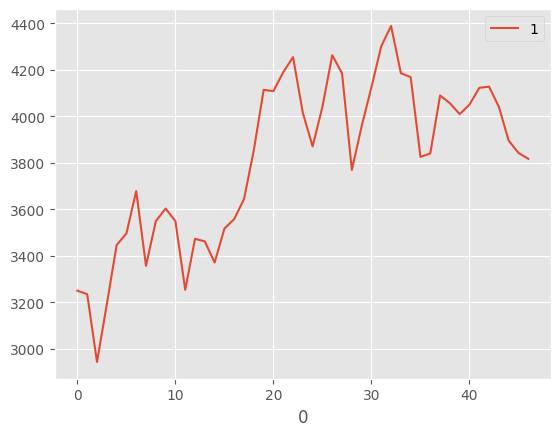

In [4]:
df1.plot()
plt.show()

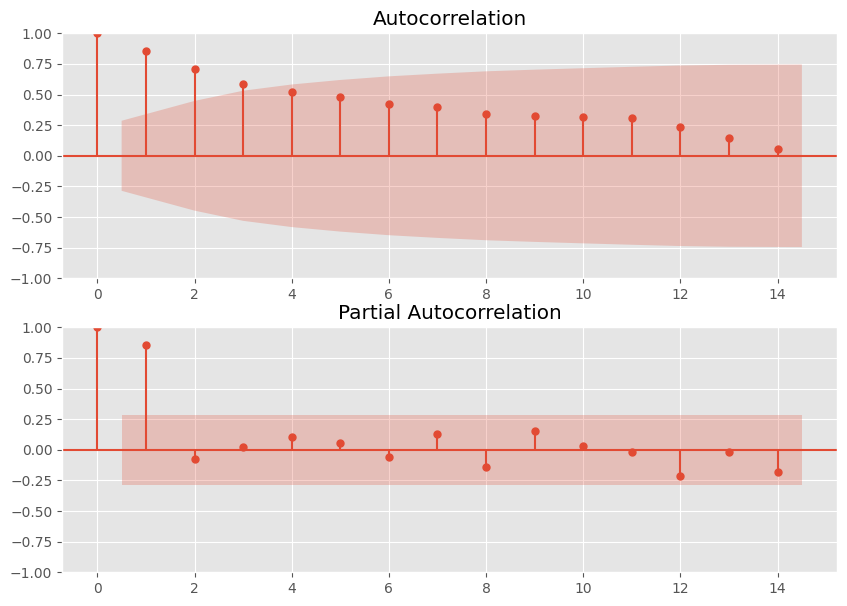

In [5]:
plt.figure(figsize=(10,7))
plt.subplot(211)
plot_acf(df1, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(df1, method='ywmle', lags=14, ax=plt.gca())
plt.show()

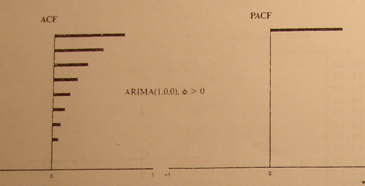

In [6]:
model = ARIMA(df1, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                   47
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -308.393
Date:                Sun, 19 May 2024   AIC                            622.785
Time:                        23:21:52   BIC                            628.336
Sample:                             0   HQIC                           624.874
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3743.8358    173.955     21.522      0.000    3402.890    4084.782
ar.L1          0.8807      0.068     13.021      0.000       0.748       1.013
sigma2      2.838e+04   7301.326      3.887      0.0

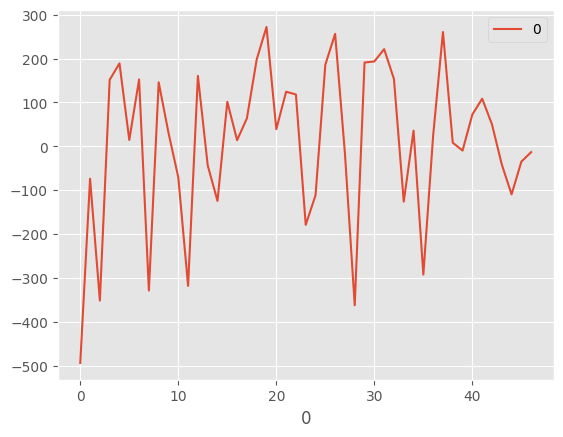

In [7]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot()
plt.show()

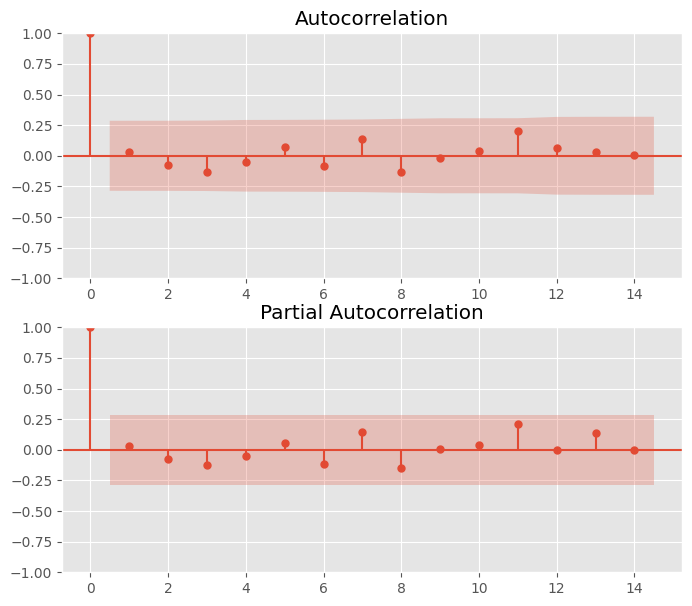

In [8]:
plt.figure(figsize=(8,7))
plt.subplot(211)
plot_acf(residuals, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=14, ax=plt.gca())
plt.show()

In [9]:
df_fit = model_fit.predict(47, 50)
df_fit[-4:]

47    3808.270993
48    3800.583418
49    3793.813025
50    3787.850388
Name: predicted_mean, dtype: float64

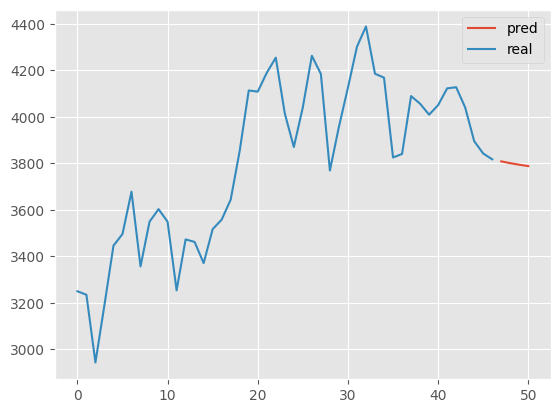

In [10]:
pred = pd.DataFrame({
    'pred': df_fit,
    'real': df1[1]})
pred.plot();

In [11]:
train_df1 = df1[:-4]
test_df1 = df1[-4:]

In [12]:
test_df1

,1
0,
43,4040
44,3895
45,3842
46,3817


In [13]:
model = ARIMA(train_df1, order=(1,0,0))
model_fit = model.fit()

df_pred = model_fit.predict(43, 46)
df_pred

43    4090.000831
44    4057.207487
45    4028.141876
46    4002.380255
Name: predicted_mean, dtype: float64

In [14]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

calculate_mape(test_df1[1], df_pred)

3.775942877977729

### Временной ряд №2596

In [29]:
df2 = pd.read_csv('M3_2596.csv', index_col=0, header=None, sep=';')
df2.head()

,1
0,
0,1819.6
1,1312.4
2,2584.0
3,1479.6
4,1742.0


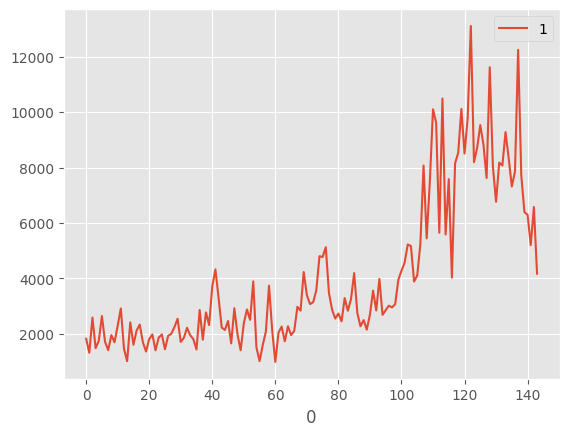

In [30]:
df2.plot()
plt.show()

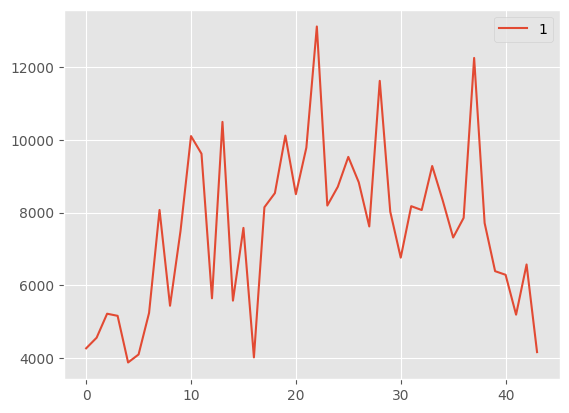

In [31]:
df2 = df2[100:]
df2.reset_index(drop=True, inplace=True)

df2.plot()
plt.show()

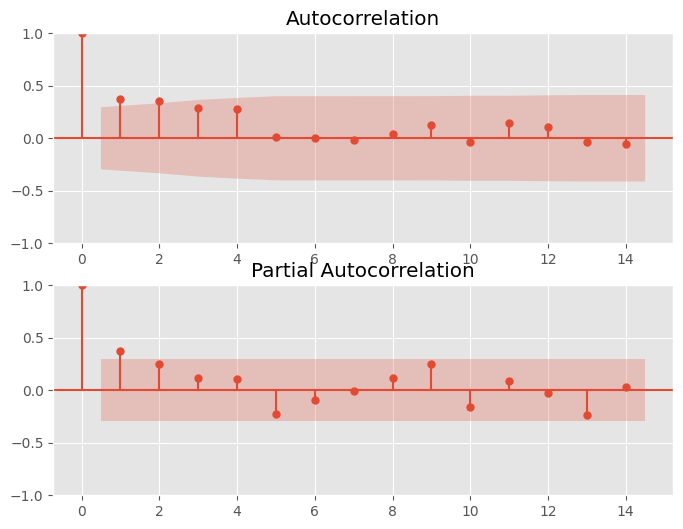

In [32]:
plt.figure(figsize=(8,6))
plt.subplot(211)
plot_acf(df2, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(df2, method='ywmle', lags=14, ax=plt.gca())
plt.show()

In [37]:
model = ARIMA(df2, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary());

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                   44
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -398.487
Date:                Mon, 20 May 2024   AIC                            802.974
Time:                        00:27:17   BIC                            808.327
Sample:                             0   HQIC                           804.959
                                 - 44                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7536.0363    515.624     14.615      0.000    6525.432    8546.640
ar.L1          0.4001      0.158      2.525      0.012       0.089       0.711
sigma2      4.177e+06   1.02e+06      4.084      0.0

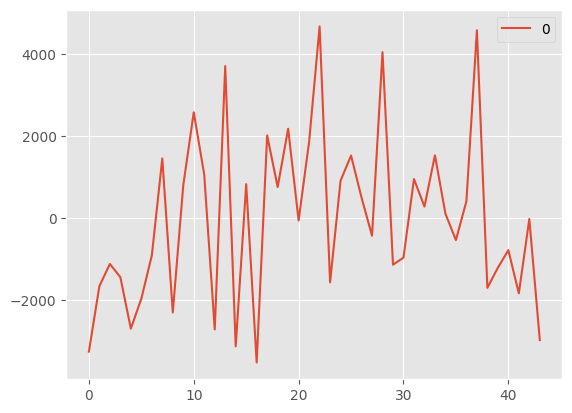

In [38]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot()
plt.show()

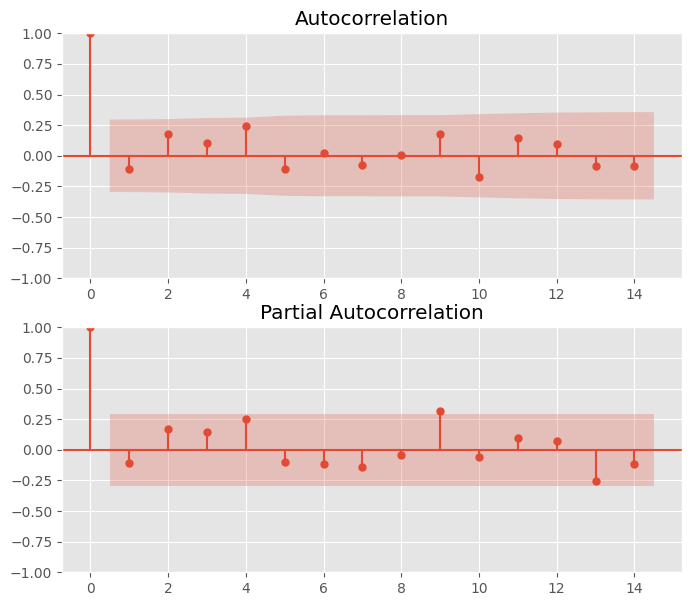

In [39]:
plt.figure(figsize=(8,7))
plt.subplot(211)
plot_acf(residuals, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=14, ax=plt.gca())
plt.show()

In [43]:
df_fit = model_fit.predict(44, 48)
df_fit[-4:]

45    6997.011825
46    7320.385976
47    7449.759963
48    7501.519290
Name: predicted_mean, dtype: float64

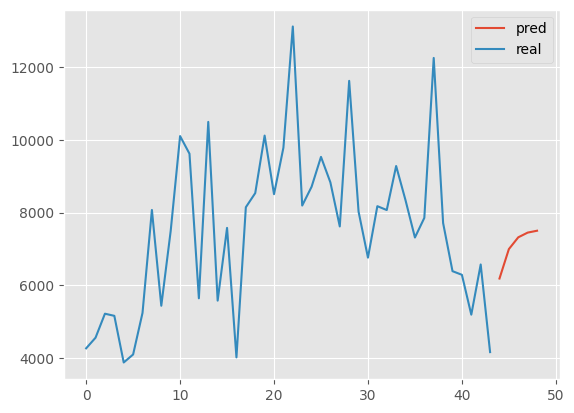

In [44]:
pred = pd.DataFrame({
    'pred': df_fit,
    'real': df2[1]})
pred.plot();

In [45]:
train_df2 = df2[:-4]
test_df2 = df2[-4:]

model = ARIMA(train_df2, order=(1,0,0))
model_fit = model.fit()

df_pred = model_fit.predict(41, 44)

In [58]:
calculate_mape(test_df2[1], df_pred)

49.02428552337083

### Временной ряд №736

In [50]:
df3 = pd.read_csv('M3_736.csv', index_col=0, header=None, sep=';')
df3 = df3.drop(columns=[2, 3])
df3.head()

,1
0,
0,1697.22
1,1782.58
2,1715.70
3,1923.82
4,1712.60


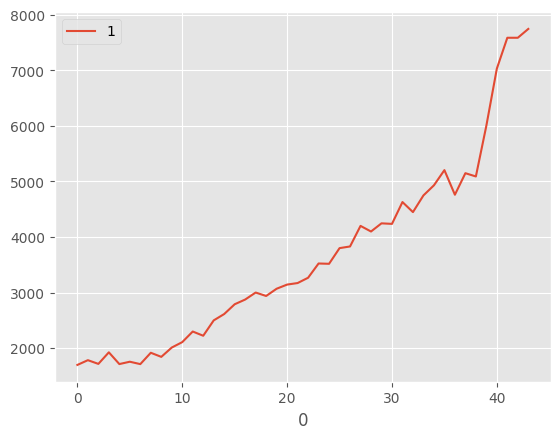

In [51]:
df3.plot()
plt.show()

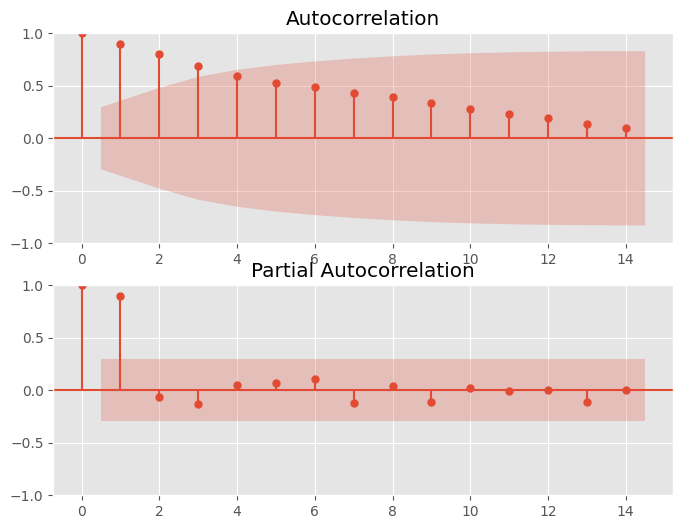

In [52]:
plt.figure(figsize=(8,6))
plt.subplot(211)
plot_acf(df3, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(df3, method='ywmle', lags=14, ax=plt.gca())
plt.show()

In [194]:
model = ARIMA(df3, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary());

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                   44
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -314.623
Date:                Mon, 15 Apr 2024   AIC                            635.245
Time:                        01:43:37   BIC                            640.598
Sample:                             0   HQIC                           637.230
                                 - 44                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3645.3268   1.07e+04      0.340      0.734   -1.74e+04    2.46e+04
ar.L1          0.9952      0.038     26.402      0.000       0.921       1.069
sigma2      8.564e+04   1.31e+04      6.533      0.0

C:\Users\asmir\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [53]:
model = ARIMA(df3, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary());

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                   44
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -305.213
Date:                Mon, 20 May 2024   AIC                            612.426
Time:                        00:51:43   BIC                            614.187
Sample:                             0   HQIC                           613.075
                                 - 44                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.562e+04   1.11e+04      7.693      0.000    6.38e+04    1.07e+05
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                31.14
Prob(Q):                              0.58   Pr

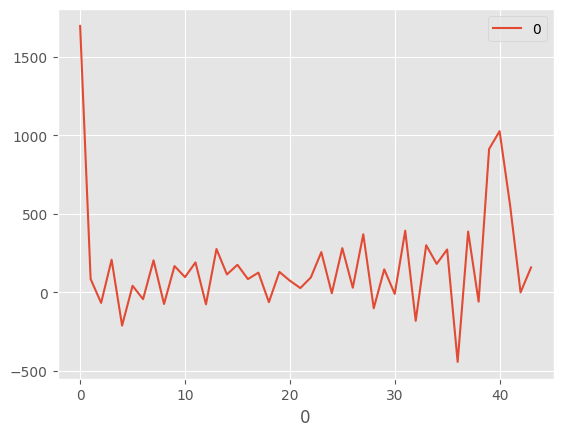

In [54]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot()
plt.show()

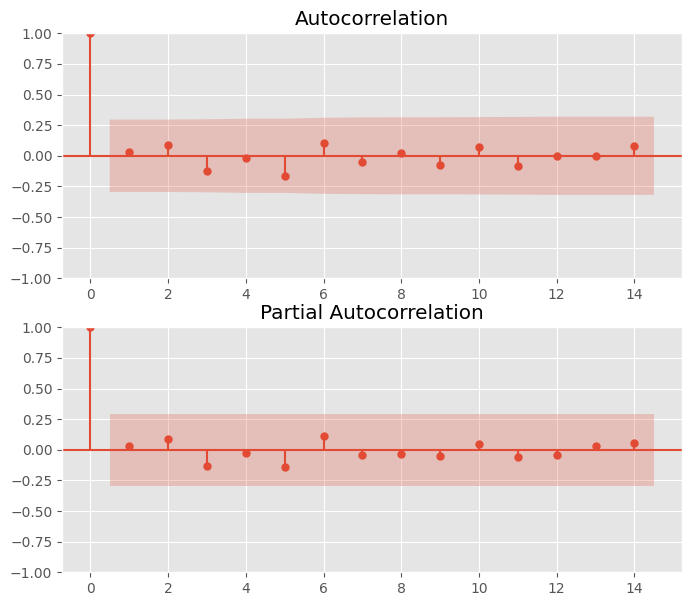

In [55]:
plt.figure(figsize=(8,7))
plt.subplot(211)
plot_acf(residuals, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=14, ax=plt.gca())
plt.show()

In [56]:
df_fit = model_fit.predict(44, 48)
df_fit[-4:]

45    7743.0
46    7743.0
47    7743.0
48    7743.0
Name: predicted_mean, dtype: float64

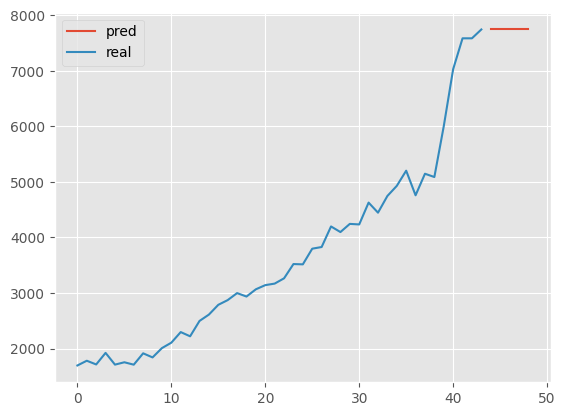

In [57]:
pred = pd.DataFrame({
    'pred': df_fit,
    'real': df3[1]})
pred.plot();

In [59]:
train_df3 = df3[:-4]
test_df3 = df3[-4:]

model = ARIMA(train_df3, order=(0,1,0))
model_fit = model.fit()

df_pred = model_fit.predict(41, 44)

In [60]:
calculate_mape(test_df3[1], df_pred)

21.406649588494517